# Métodos de optimizción basados en gradiente

El gradiente descendiente es el método estándar para realizar optimización de los pesos en una red neuronal. Pero existen diferentes formas de implementar esta optimización, como por ejemplo: Sotchastic Gradient Descent (SGD), Batch Gradient Descent o Mini-batch Gradient Descent. 

Una parte importante del método de gradiente descendiente es la elección de rango de aprendizaje. Existen métodos que buscan estimar un rango de aprendizaje que pueda permitir una convergencia de los pesos de la red adecuada. Aquí exploramos dos de estos métodos: 1) Adagrad y 2) Adam. Además comparamos con un grdiente descendiente stocástico.

In [1]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Datos de entrenamiento

elegimos una tarea de clasificiación binaria simple:

In [2]:
#Abrir los datos
data = pd.read_csv('cat_data.csv')
data

,¿es animal?,¿es mamífero?,¿es felino?,¿es doméstico?,¿tiene dos orejas?,¿es negro?,¿tiene cuatro patas?,¿es gato?
0,1,1,1,1,1,1,1,1
1,0,0,0,1,0,1,0,0
2,1,0,1,1,0,1,1,0
3,1,1,0,1,1,0,1,0
4,1,1,1,0,1,0,1,0
5,1,1,1,1,0,0,0,1
6,1,0,0,1,1,1,0,0
7,1,1,1,1,0,0,1,1
8,1,0,0,1,0,0,0,0
9,0,0,0,0,0,0,0,0


In [3]:
#Convertir los datos a numpy
npData = data.to_numpy()
#Ejemplos
X = npData[:,:-1]
#Clases de los ejemplos
Y = npData[:,-1]

#Tamaño de los datos
#Unidades de entrada
N,d = X.shape

print('Número de vectores de entrenamiento: {}, con dimensión: {}'.format(N,d))

Número de vectores de entrenamiento: 14, con dimensión: 7


Visualizamos los datos en dos dimensiones:

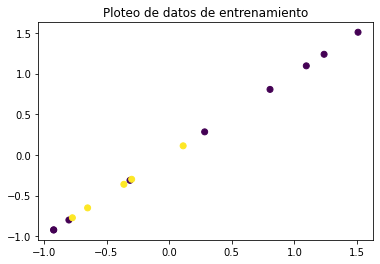

In [4]:
#Reducción de dimensionalidad
X_plot = PCA(2).fit_transform(X)
#Visualización
plt.scatter(X_plot[:,0],X_plot[:,0], c=Y)
plt.title('Ploteo de datos de entrenamiento')
plt.show()

Una vez preparados los datos de entrenamiento, procedemos a estimar los pesos de la red; para esto, utilizamos en primer lugrar SGD.

# SGD

En el SGD se tiene que:

* Se actualizan los pesos cada vez que se observa un ejemplo. 
* El rango de aprendizaje es un hiperparámetro fijo, esto es, no varía durante el entrenamiento.

In [5]:
%%time

#Inicializar pesos
np.random.seed(0)
h_dim = 3
W1 = np.random.rand(h_dim,d)/np.sqrt(d)
b1 = np.ones(h_dim)
W2 = np.random.rand(2,h_dim)/np.sqrt(h_dim)
b2 = np.ones(2)

#Hiperparámetros
its = 1000
eta = 1

t = 0
stop = False
while stop == False:
    error = 0
    for x,y in zip(X,Y):
        #FORWARD
        a1 = np.dot(W1,x)+b1
        h = np.tanh(a1)
        a2 = np.dot(W2,h)+b2
        exp = np.exp(a2)
        f = exp/exp.sum(0)
        
        #BACKWARD
        d_out = exp/exp.sum(0)
        d_out[y] -= 1
        
        d_h = (1-h**2)*np.dot(W2.T,d_out)        

        DW2 = np.outer(d_out,h)
        Db2 = d_out
        
        DW1 = np.outer(d_h,x)
        Db1 = d_h
        
        #Actualización de pesos
        #El rango de aprendizaje es fijo
        W2 -= eta*DW2
        b2 -= eta*Db2
        W1 -= eta*DW1
        b1 -= eta*Db1
        
        #Error cuadrático
        error += (np.argmax(f)-y)**2
        
    t += 1
    print('Error en iteración {}: {}'.format(t,error))
    #Condición de finalización
    if error == 0 or t == its:
        stop = True
    

Error en iteración 1: 7
Error en iteración 2: 6
Error en iteración 3: 3
Error en iteración 4: 7
Error en iteración 5: 6
Error en iteración 6: 6
Error en iteración 7: 6
Error en iteración 8: 6
Error en iteración 9: 6
Error en iteración 10: 6
Error en iteración 11: 6
Error en iteración 12: 6
Error en iteración 13: 6
Error en iteración 14: 6
Error en iteración 15: 6
Error en iteración 16: 6
Error en iteración 17: 6
Error en iteración 18: 6
Error en iteración 19: 6
Error en iteración 20: 6
Error en iteración 21: 6
Error en iteración 22: 6
Error en iteración 23: 6
Error en iteración 24: 5
Error en iteración 25: 5
Error en iteración 26: 6
Error en iteración 27: 6
Error en iteración 28: 6
Error en iteración 29: 6
Error en iteración 30: 7
Error en iteración 31: 4
Error en iteración 32: 4
Error en iteración 33: 5
Error en iteración 34: 6
Error en iteración 35: 6
Error en iteración 36: 6
Error en iteración 37: 6
Error en iteración 38: 6
Error en iteración 39: 6
Error en iteración 40: 6
Error en 

Error en iteración 598: 2
Error en iteración 599: 2
Error en iteración 600: 2
Error en iteración 601: 2
Error en iteración 602: 2
Error en iteración 603: 2
Error en iteración 604: 2
Error en iteración 605: 2
Error en iteración 606: 2
Error en iteración 607: 2
Error en iteración 608: 2
Error en iteración 609: 2
Error en iteración 610: 2
Error en iteración 611: 2
Error en iteración 612: 2
Error en iteración 613: 2
Error en iteración 614: 2
Error en iteración 615: 2
Error en iteración 616: 2
Error en iteración 617: 2
Error en iteración 618: 2
Error en iteración 619: 2
Error en iteración 620: 2
Error en iteración 621: 2
Error en iteración 622: 2
Error en iteración 623: 2
Error en iteración 624: 2
Error en iteración 625: 2
Error en iteración 626: 2
Error en iteración 627: 2
Error en iteración 628: 2
Error en iteración 629: 2
Error en iteración 630: 2
Error en iteración 631: 2
Error en iteración 632: 2
Error en iteración 633: 2
Error en iteración 634: 2
Error en iteración 635: 2
Error en ite

Error en iteración 917: 2
Error en iteración 918: 2
Error en iteración 919: 2
Error en iteración 920: 2
Error en iteración 921: 2
Error en iteración 922: 2
Error en iteración 923: 2
Error en iteración 924: 2
Error en iteración 925: 2
Error en iteración 926: 2
Error en iteración 927: 2
Error en iteración 928: 2
Error en iteración 929: 2
Error en iteración 930: 2
Error en iteración 931: 2
Error en iteración 932: 2
Error en iteración 933: 2
Error en iteración 934: 2
Error en iteración 935: 2
Error en iteración 936: 2
Error en iteración 937: 2
Error en iteración 938: 2
Error en iteración 939: 2
Error en iteración 940: 2
Error en iteración 941: 2
Error en iteración 942: 2
Error en iteración 943: 2
Error en iteración 944: 2
Error en iteración 945: 2
Error en iteración 946: 2
Error en iteración 947: 2
Error en iteración 948: 2
Error en iteración 949: 2
Error en iteración 950: 2
Error en iteración 951: 2
Error en iteración 952: 2
Error en iteración 953: 2
Error en iteración 954: 2
Error en ite

Podemos definir una función forward para observar el resultado de la red con los pesos aprendidos.

In [7]:
def forward(X):
    a1 = np.dot(X,W1.T)+b1
    h = np.tanh(a1)
    a2 = np.dot(h,W2.T)+b2
    exp = np.exp(a2)
    f = exp/exp.sum(1, keepdims=True)
    
    return f

print(np.argmax(forward(X), axis=1),Y)

[0 0 0 0 0 1 0 1 0 0 0 0 1 1] [1 0 0 0 0 1 0 1 0 0 0 0 1 1]


## ADAGRAD

El método de Adagrad se basa en el SGD, pero aquí el rango de aprendizaje varía, y las actualizaciones se realizan según la regla:

$$\theta_i \leftarrow \theta_i - \frac{\eta}{\sqrt{\mu}+\epsilon} \nabla_{\theta_i} R(\theta)$$

Donde $\mu$ es un parámetro que varía según la siguiente regla:

$$\mu \leftarrow \mu + [\nabla_{\theta_i} R(\theta)]^2$$

In [8]:
%%time
#Inicializar pesos
np.random.seed(0)
h_dim = 3
W1 = np.random.rand(h_dim,d)/np.sqrt(d)
b1 = np.ones(h_dim)
W2 = np.random.rand(2,h_dim)/np.sqrt(h_dim)
b2 = np.ones(2)

#Hiperparámetros
its = 1000

#Rango de aprendizahe inicial
eta = 1
#Epsilon
eps = 1e-8
#Inicialización del parámetro mu
#Se utiliza uno para cada matriz de pesos
mu1 = 0
mub1 = 0
mu2 = 0
mub2 = 0

t = 0
stop = False
while stop == False:
    error = 0
    for x,y in zip(X,Y):
        #FORWARD
        a1 = np.dot(W1,x)+b1
        h = np.tanh(a1)
        a2 = np.dot(W2,h)+b2
        exp = np.exp(a2)
        f = exp/exp.sum(0)
        
        #BACKWARD
        d_out = exp/exp.sum(0)
        d_out[y] -= 1
        d_h = (1-h**2)*np.dot(W2.T,d_out)        

        #Derivadas
        DW2 = np.outer(d_out,h)
        Db2 = d_out
        DW1 = np.outer(d_h,x)
        Db1 = d_h
        
        #ADAGRAD
        #Actualizació de mu
        mu1 += DW1**2
        mub1 += Db1**2
        mu2 += DW2**2
        mub2 += Db2**2
        
        #Cada matriz de pesos se actualiza por Adagrad
        W2 -= (eta/(np.sqrt(mu2)+eps))*DW2
        b2 -= (eta/(np.sqrt(mub2)+eps))*Db2
        W1 -= (eta/(np.sqrt(mu1)+eps))*DW1
        b1 -= (eta/(np.sqrt(mub1)+eps))*Db1
        
        #Error cuadrático
        error += (np.argmax(f)-y)**2
        
    t += 1
    print('Error en iteración {}: {}'.format(t,error))
    #Condición de paro
    if error == 0 or t == its:
        stop = True

Error en iteración 1: 7
Error en iteración 2: 6
Error en iteración 3: 6
Error en iteración 4: 6
Error en iteración 5: 6
Error en iteración 6: 6
Error en iteración 7: 6
Error en iteración 8: 6
Error en iteración 9: 6
Error en iteración 10: 5
Error en iteración 11: 5
Error en iteración 12: 5
Error en iteración 13: 5
Error en iteración 14: 4
Error en iteración 15: 5
Error en iteración 16: 5
Error en iteración 17: 5
Error en iteración 18: 3
Error en iteración 19: 2
Error en iteración 20: 2
Error en iteración 21: 2
Error en iteración 22: 3
Error en iteración 23: 3
Error en iteración 24: 3
Error en iteración 25: 3
Error en iteración 26: 2
Error en iteración 27: 2
Error en iteración 28: 2
Error en iteración 29: 0
CPU times: user 42.9 ms, sys: 13.1 ms, total: 56.1 ms
Wall time: 42.7 ms


In [9]:
def forward(X):
    a1 = np.dot(X,W1.T)+b1
    h = np.tanh(a1)
    a2 = np.dot(h,W2.T)+b2
    exp = np.exp(a2)
    f = exp/exp.sum(1, keepdims=True)
    
    return f

print(np.argmax(forward(X), axis=1),Y)

[1 0 0 0 0 1 0 1 0 0 0 0 1 1] [1 0 0 0 0 1 0 1 0 0 0 0 1 1]


## ADAM

Es un método basado en SGD, pero donde el rango de aprendizaje y los valores de cambio varían, siendo que la actualización de los pesos de la red se actualizan por medio de la regla:

$$\theta_i \leftarrow \theta_i - \frac{\eta}{\sqrt{\hat{\nu}} + \epsilon} \hat{m}$$

Donde:

$$\hat{m} = \frac{m}{1-\beta_1}$$

y:

$$\hat{\nu} = \frac{\nu}{1-\beta_2}$$

Tal que $m$ es un parámetro que se actualiza como:

$$m \leftarrow \beta_1 m + (1-\beta_1) \nabla_\theta R(\theta)$$

Mientras que $\nu$ es actualizado como:

$$\nu \leftarrow \beta_2 \nu + (1-\beta_2) [\nabla_\theta R(\theta)]^2$$

Aquí, $\beta_1, \beta_2\in [0,1]$ son dos hiperparámetros.

In [10]:
%%time
#Inicializar pesos
np.random.seed(0)
h_dim = 3
W1 = np.random.rand(h_dim,d)/np.sqrt(d)
b1 = np.ones(h_dim)
W2 = np.random.rand(2,h_dim)/np.sqrt(h_dim)
b2 = np.ones(2)

#Hiperparámetros
#Núm de iteraciones
its = 1000

#Para ADAM
#Rango de aprendizaje inicial
eta = 1
#Epsilón
eps = 1e-8
#hiperparámetros beta1 y beta2
beta1 = 0.0009
beta2 = 0.0009
#Inicialización de m y nu
#Se tiene uno por cada matriz de pesos
m1 = 0
mb1 = 0
m2 = 0
mb2 = 0
v1 = 0
vb1 = 0
v2 = 0
vb2 = 0

t = 0
stop = False
while stop == False:
    error = 0
    for x,y in zip(X,Y):
        #FORWARD
        a1 = np.dot(W1,x)+b1
        h = np.tanh(a1)
        a2 = np.dot(W2,h)+b2
        exp = np.exp(a2)
        f = exp/exp.sum(0)
        
        #BACKWARD
        d_out = exp/exp.sum(0)
        d_out[y] -= 1
        d_h = (1-h**2)*np.dot(W2.T,d_out)        

        #Derivadas
        DW2 = np.outer(d_out,h)
        Db2 = d_out
        DW1 = np.outer(d_h,x)
        Db1 = d_h
        
        #ADAM
        #Actualización Primer momento
        m1 = beta1*m1 + (1-beta1)*DW1
        mb1 = beta1*mb1 + (1-beta1)*Db1
        m2 = beta1*m2 + (1-beta1)*DW2
        mb2 = beta1*mb2 + (1-beta1)*Db2
        #Actualización Segundo momento
        v1 = beta2*v1 + (1-beta2)*DW1**2
        vb1 = beta2*vb1 + (1-beta2)*Db1**2
        v2 = beta2*v2 + (1-beta2)*DW2**2
        vb2 = beta2*vb2 + (1-beta2)*Db2**2
        
        #Ponderación m
        m1_p = m1/(1-beta1)
        mb1_p = mb1/(1-beta1)
        m2_p = m2/(1-beta1)
        mb2_p = mb2/(1-beta1)
        #Ponderación nu
        v1_p = v1/(1-beta2)
        vb1_p = vb1/(1-beta2)
        v2_p = v2/(1-beta2)
        vb2_p = vb2/(1-beta2)
        
        #Actualización de pesos con ADAM
        W2 -= (eta/(np.sqrt(v2_p)+eps))*m2_p
        b2 -= (eta/(np.sqrt(vb2_p)+eps))*mb2_p
        W1 -= (eta/(np.sqrt(v1_p)+eps))*m1_p
        b1 -= (eta/(np.sqrt(vb1_p)+eps))*mb1_p
        
        #Error cuadrático
        error += (np.argmax(f)-y)**2
        
    t += 1
    print('Error en iteración {}: {}'.format(t,error))
    #Condición de paro
    if error == 0 or t == its:
        stop = True

Error en iteración 1: 7
Error en iteración 2: 7
Error en iteración 3: 6
Error en iteración 4: 6
Error en iteración 5: 5
Error en iteración 6: 4
Error en iteración 7: 5
Error en iteración 8: 4
Error en iteración 9: 3
Error en iteración 10: 3
Error en iteración 11: 3
Error en iteración 12: 3
Error en iteración 13: 3
Error en iteración 14: 0
CPU times: user 28.4 ms, sys: 3.76 ms, total: 32.1 ms
Wall time: 27.3 ms


In [11]:
def forward(X):
    a1 = np.dot(X,W1.T)+b1
    h = np.tanh(a1)
    a2 = np.dot(h,W2.T)+b2
    exp = np.exp(a2)
    f = exp/exp.sum(1, keepdims=True)
    
    return f

print(np.argmax(forward(X), axis=1),Y)

[0 0 0 0 0 1 0 1 0 0 0 0 1 1] [1 0 0 0 0 1 0 1 0 0 0 0 1 1]
